***Color manual***

<div class="alert alert-block alert-success">
<b>Green - Libraries</b>
</div>

<div class="alert alert-block alert-info">
<b>Blue - Information</b>
</div>

<div class="alert alert-block alert-danger">
<b>Red - Problems</b>
</div>

***

<div class="alert alert-block alert-success">
<b>Import libraries</b>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
sns.set_style("ticks")
%matplotlib inline

<div class="alert alert-block alert-info">
<b>Load the Data, set index and info about data</b>
</div>

In [22]:
###############################################################################
# Alternative method to load data                                             #   
# path =r"C:\Users\Sif\Documents\Data\population-time-series-data\POPTHM.csv" #
# df = pd.read_csv(path)                                                      #
#                                                                             #
# df = pd.read_csv('POPTHM.csv')                                              #
# df.rename(columns = {'POPTHM': 'value', 'DATE': 'date'}, inplace = True)    #
# df['date'] = pd.to_datetime(df['date'])                                     #
# df.set_index('date', inplace = True)                                        #
###############################################################################

df = pd.read_csv('POPTHM.csv')
df.rename(columns = {'POPTHM': 'value', 'DATE': 'date'}, inplace = True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 733 entries, 1959-01-01 to 2020-01-01
Data columns (total 1 columns):
value    733 non-null float64
dtypes: float64(1)
memory usage: 11.5 KB


<div class="alert alert-block alert-info">
<b>Plot original time series</b>
</div>

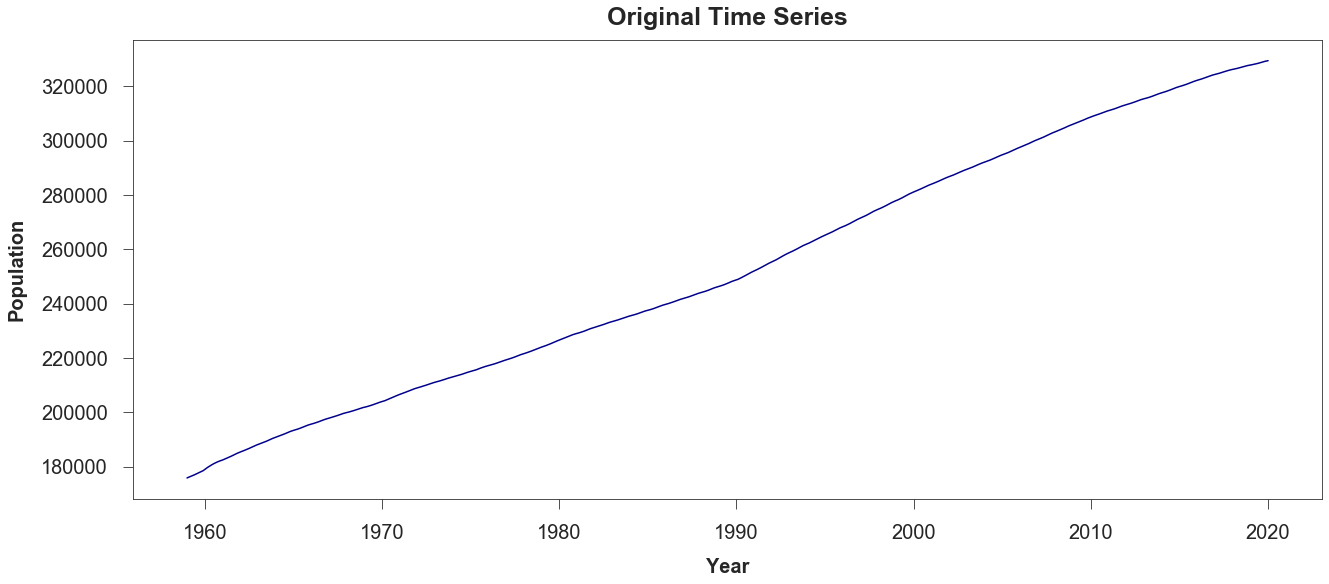

In [18]:
plt.figure(figsize = (20,10))
plt.rc('font', weight = 'normal')
plt.title('Original Time Series', weight = 'bold', fontsize = 25, pad= 15)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Population', weight = 'bold', fontsize = 20,  labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10,)                                
plt.tight_layout(pad = 5)                                               
plt.rc('font', size = 15)
plt.plot(df, color = 'darkblue')
plt.show()

<div class="alert alert-block alert-info">
<b>Pick a year to plot</b>
</div>

Type the year you want to plot from 1959 to 2019: 1990


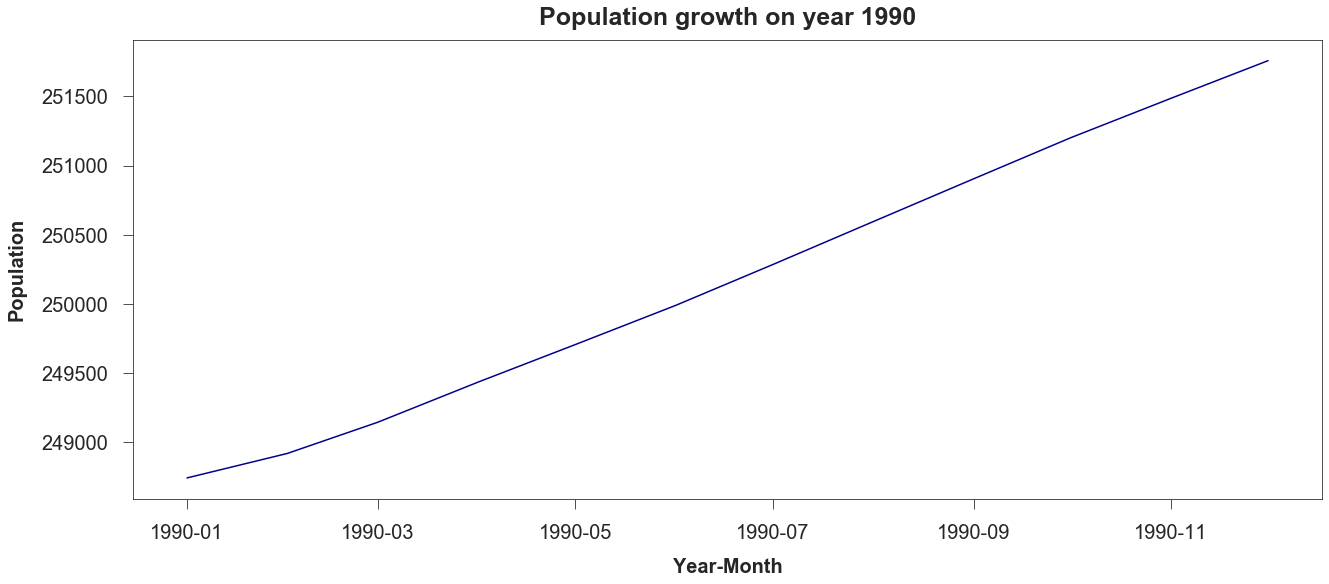

In [4]:
year = int(input("Type the year you want to plot from 1959 to 2019: "))
if year > 1958 and year < 2020:
    plt.figure(figsize = (20,10))
    plt.rc('font', weight = 'normal')
    plt.title('Population growth on year %.0f' % year, weight = 'bold', fontsize = 25, pad= 15)
    plt.xlabel('Year-Month', weight = 'bold', fontsize = 20, labelpad = 15)
    plt.ylabel('Population', weight = 'bold', fontsize = 20,  labelpad = 15)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(axis = 'both', pad = 15, size = 10,)                                
    plt.tight_layout(pad = 5)                                               
    plt.rc('font', size = 15)                                                                                      
    dfyear1 = df[df.index.year == year]
    plt.plot(dfyear1, color = 'darkblue')
    plt.show()
else:
    print("Run again and type a valid year")

<div class="alert alert-block alert-info">
<b>Pick multiple years to plot</b>
</div>

Type the year you wanna start from 1959 to 2018: 2015
Type the year you wanna stop from 1960 to 2019: 2019


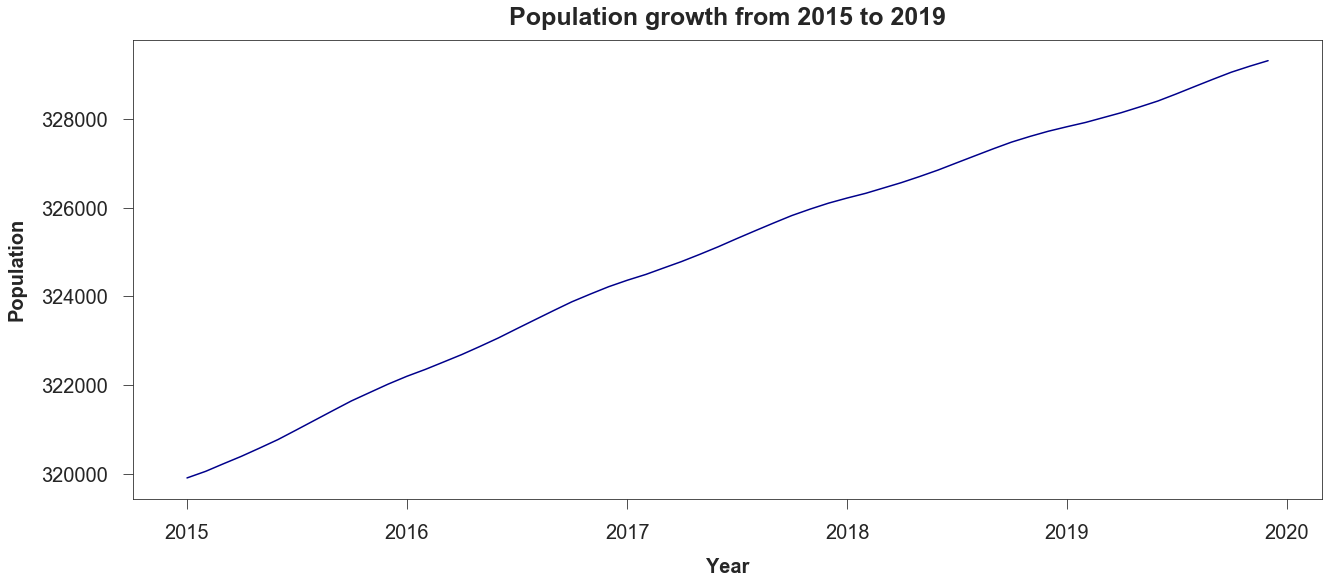

In [5]:
year_s = int(input("Type the year you wanna start from 1959 to 2018: "))
year_p = int(input("Type the year you wanna stop from 1960 to 2019: "))
if year_s > 1958 and year_s < year_p and year_p > year_s and year_p < 2020:
    plt.figure(figsize = (20,10))
    plt.rc('font', weight = 'normal')
    plt.title('Population growth from %.0f to %.0d' % (year_s, year_p), weight = 'bold', fontsize = 25, pad= 15)
    plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 15)
    plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 15)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(axis = 'both', pad = 15, size = 10,)                                  
    plt.tight_layout(pad = 5)                                               
    plt.rc('font', size = 15)
    dfyear2 = df[(df.index.year >= year_s) & (df.index.year <= year_p)]
    plt.plot(dfyear2, color = 'darkblue')
    plt.show()
else:
    print("Run again and type a valid year(s)")

<div class="alert alert-block alert-info">
<b>Create first difference and erase past missing value(s)</b>
</div>

In [20]:
#########################################################################################################################
#                                                                                                                       #
# Use this to get first difference -> diff = df['value'].diff() is equal to diff = df['value'] - df['value'].shift()    #
# Use this to get only numerical value -> ._get_numeric_data()                                                          #
# Use this to get only assign value inside a column or row -> .dropna()                                                 #
# So does diff._get_numeric_data().dropna() works on both,                                                              #
#                                                                                                                       #
#########################################################################################################################

diff = df['value'].diff()._get_numeric_data().dropna()

<div class="alert alert-block alert-info">
<b>Normal distribution of first difference values</b>
</div>

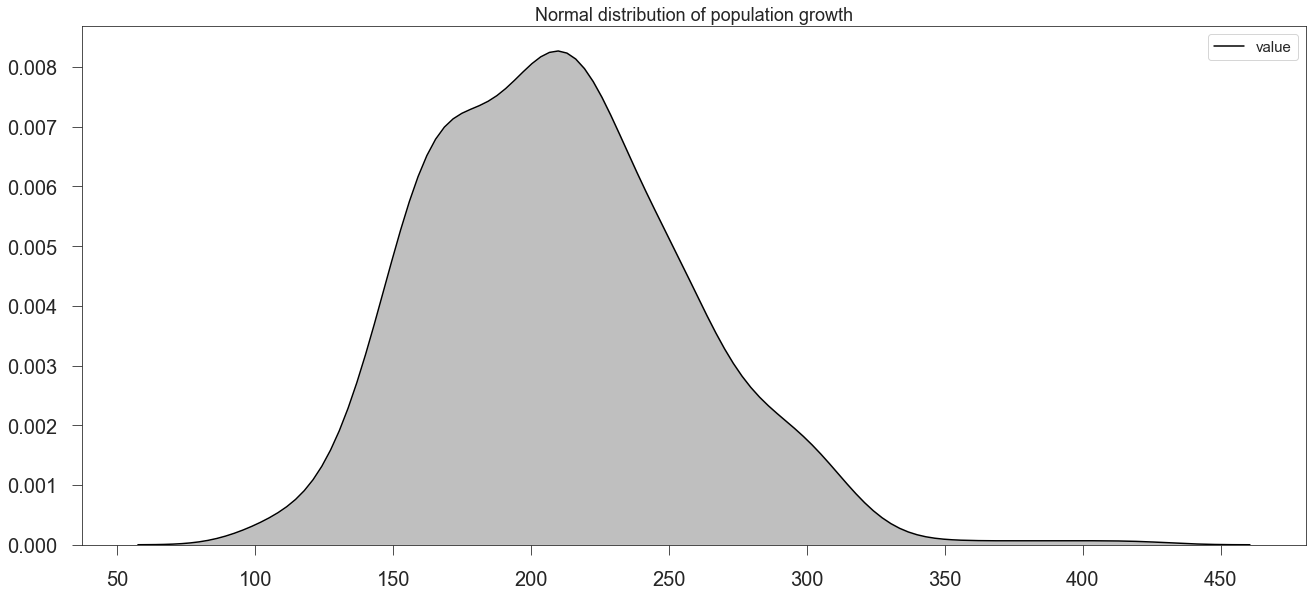

In [7]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)  
plt.tight_layout(pad = 5)                                               
plt.rc('font', size = 15)
normal = sns.kdeplot(diff, color = 'black', shade = True).set_title("Normal distribution of population growth")
plt.show()

<div class="alert alert-block alert-info">
<b>Check if the time series of original and first difference values are stationary</b>
</div>

In [8]:
result = adfuller(df['value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]['5%']:
    print ('Reject Ho - Time Series is Stationary')
else:
    print ('Failed to Reject Ho - Original Time Series is Non-Stationary')

ADF Statistic: 0.185761
p-value: 0.971452
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Failed to Reject Ho - Original Time Series is Non-Stationary


In [9]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]['5%']:
    print ('Reject Ho - Time Series is Stationary')
else:
    print ('Failed to Reject Ho - First Difference Time Series is Non-Stationary')

ADF Statistic: -2.169215
p-value: 0.217608
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Failed to Reject Ho - First Difference Time Series is Non-Stationary


<div class="alert alert-block alert-info">
<b>Data results summary</b>
</div>

In [10]:
Y = diff[~np.isnan(diff.values)]
ts_values_orig = df['value'].values
ts_values = ts_values_orig[:-1]
X = sm.add_constant(ts_values)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6258
Date:                Thu, 26 Mar 2020   Prob (F-statistic):              0.429
Time:                        05:49:31   Log-Likelihood:                -3848.8
No. Observations:                 732   AIC:                             7702.
Df Residuals:                     730   BIC:                             7711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        217.4288      9.743     22.317      0.0

<div class="alert alert-block alert-info">
<b>Autocorrelation and Partial Autocorrelation original and first difference values</b>
</div>

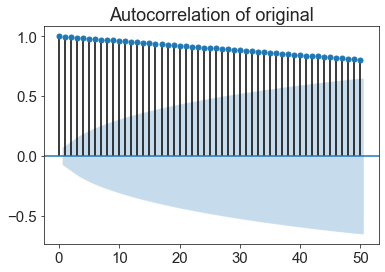

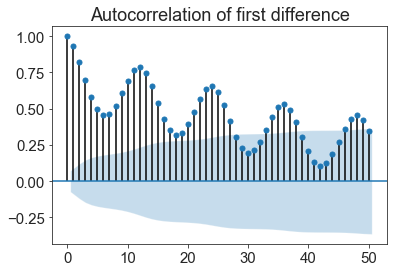

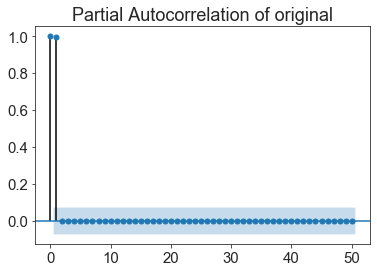

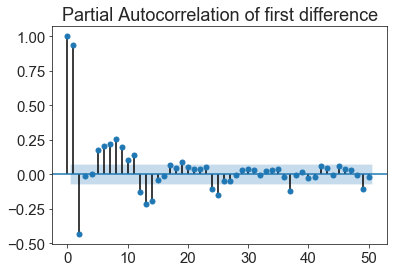

In [11]:
acf = plot_acf(df['value'],  title = 'Autocorrelation of original', lags = 50)
acf_diff = plot_acf(diff, title = 'Autocorrelation of first difference', lags = 50)

pacf = plot_pacf(df['value'],  title = 'Partial Autocorrelation of original', lags = 50)
pacf_diff = pacf = plot_pacf(diff,  title = 'Partial Autocorrelation of first difference', lags = 50)

<div class="alert alert-block alert-info">
<b>Decomposition of time series</b>
</div>

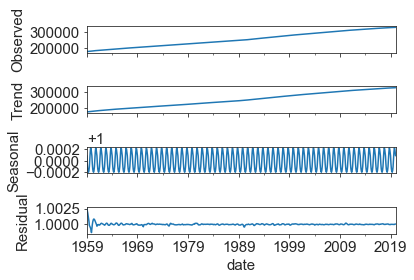

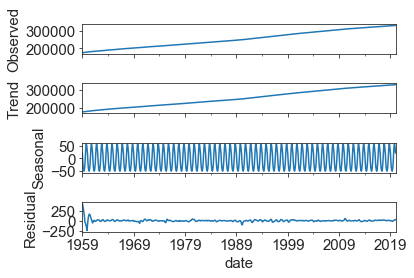

In [12]:
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
mul_plot = result_mul.plot()

result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')
add_plot = result_add.plot()

<div class="alert alert-block alert-info">
<b>Moving average</b>
</div>

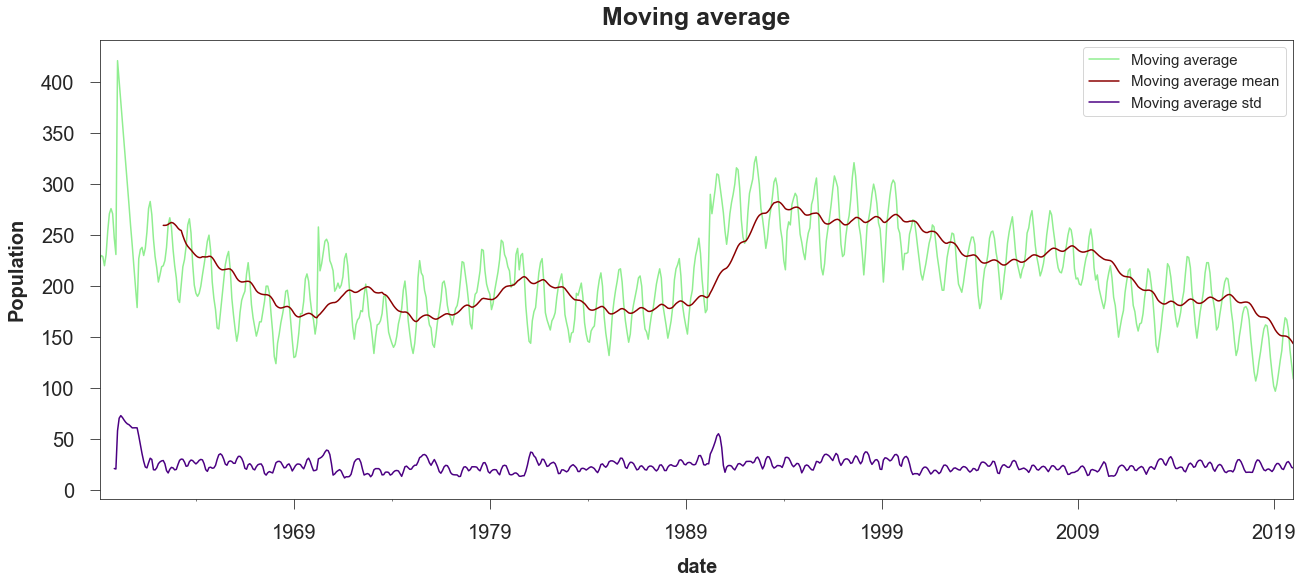

In [13]:
plt.figure(figsize = (20,10))
diff.plot(label = 'Moving average', color = 'lightgreen')
plt.rc('font', weight = 'normal')
plt.title('Moving average', weight = 'bold', fontsize = 25, pad= 15)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10,)                                  
plt.tight_layout(pad = 5)                                               
plt.rc('font', size = 15)
ma_mean = diff.rolling(40).mean()
ma_mean.plot(label = 'Moving average mean', color = 'darkred')
ma_std = diff.rolling(10).std()
ma_std.plot(label = 'Moving average std', color = 'indigo')
plt.legend(loc = 'best', prop = {'size':15})
plt.show()

<div class="alert alert-block alert-info">
<b>Decomposition of moving average</b>
</div>

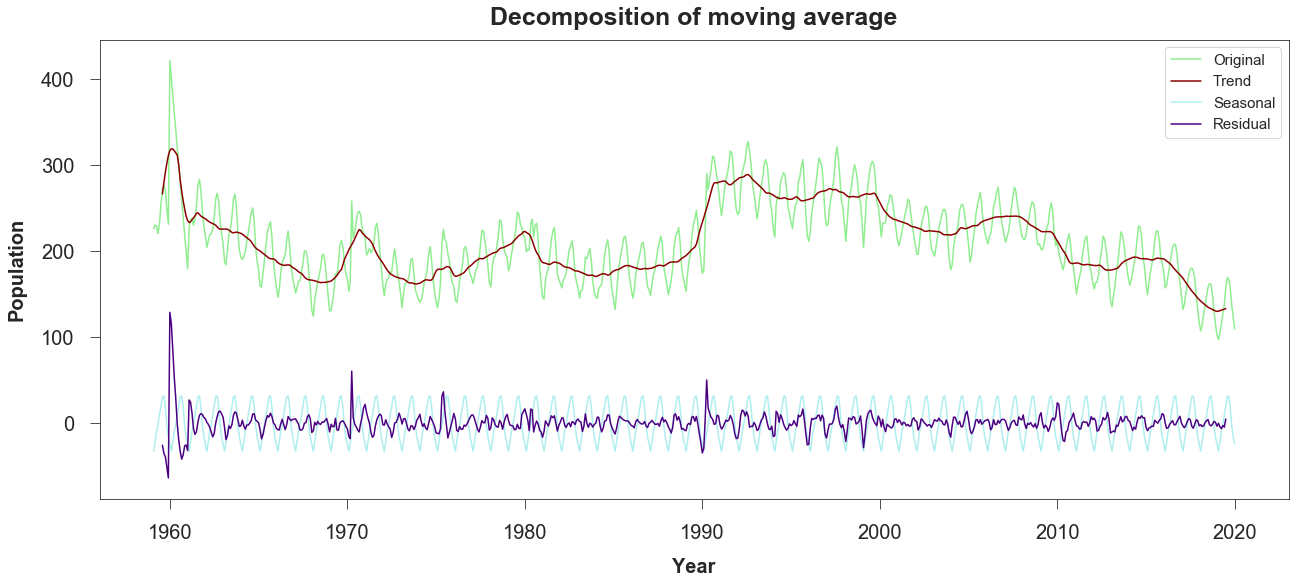

In [14]:
decomposition = seasonal_decompose(diff)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize = (20,10))
plt.title('Decomposition of moving average', weight = 'bold', fontsize = 25, pad= 15)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10,)                                  
plt.tight_layout(pad = 5)                                               
plt.rc('font', size = 15)
plt.rc('font', weight = 'normal')
plt.plot(diff, label = 'Original', color = 'lightgreen')
plt.plot(trend, label = 'Trend', color = 'darkred')
plt.plot(seasonal, label = 'Seasonal', color = 'paleturquoise')
plt.plot(residual, label = 'Residual', color = 'indigo')
plt.legend(loc = 'best', prop = {'size':15})
plt.show()

<div class="alert alert-block alert-info">
<b>Last year values</b>
</div>

In [15]:
df.tail(13)

,value
date,
2019-01-01,327824.0
2019-02-01,327921.0
2019-03-01,328025.0
2019-04-01,328140.0
2019-05-01,328267.0
2019-06-01,328404.0
2019-07-01,328561.0
2019-08-01,328730.0
2019-09-01,328897.0


<div class="alert alert-block alert-info">
<b>Building the ARIMA model and show model results (Statistical Approach)</b>
</div>

In [16]:
########################################
#                                      #
# the best one is P = 1,  D = 1, Q = 0 # 
#                                      # 
########################################

P = int(input("Type P parameter you want: "))
D = int(input("Type D parameter you want: "))
Q = int(input("Type Q parameter you want: "))

model = ARIMA(df['value'].values, order = (P, D, Q))
model_fit = model.fit()
print(model_fit.summary())

prediction = model_fit.forecast(11)[0]

Type P parameter you want: 1
Type D parameter you want: 1
Type Q parameter you want: 0
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  732
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3068.778
Method:                       css-mle   S.D. of innovations             15.989
Date:                Thu, 26 Mar 2020   AIC                           6143.557
Time:                        05:49:38   BIC                           6157.344
Sample:                             1   HQIC                          6148.875
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        208.0767      9.780     21.277      0.000     188.909     227.244
ar.L1.D.y      0.9408      0.013     74.629 

<div class="alert alert-block alert-info">
<b>Plot original and fitted series ARIMA model</b>
</div>

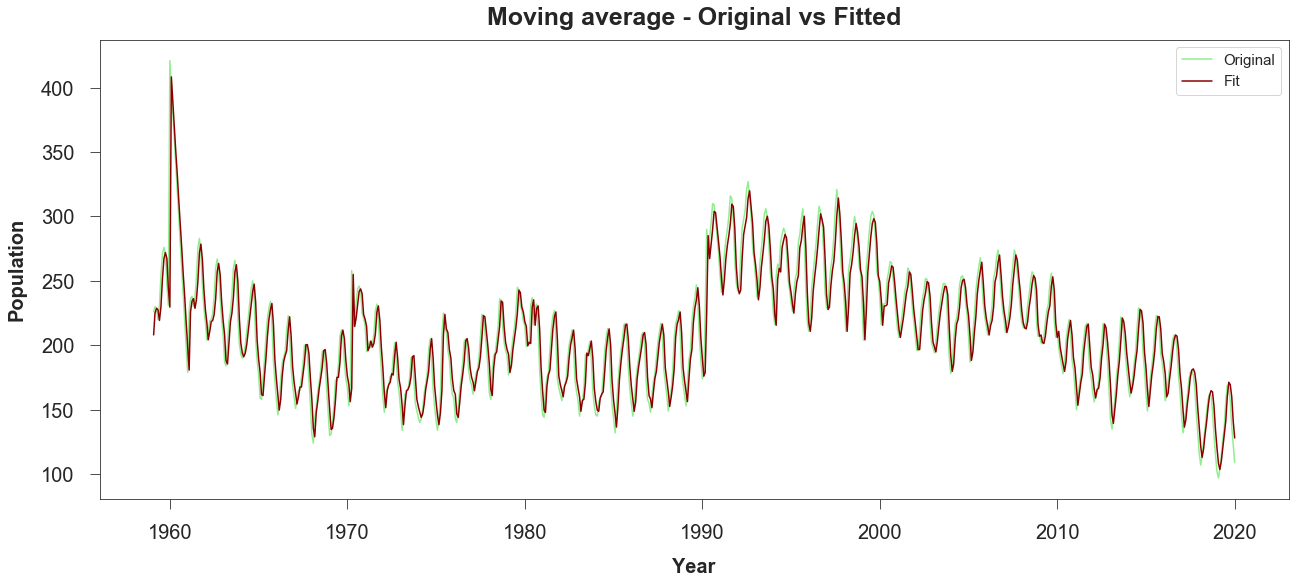

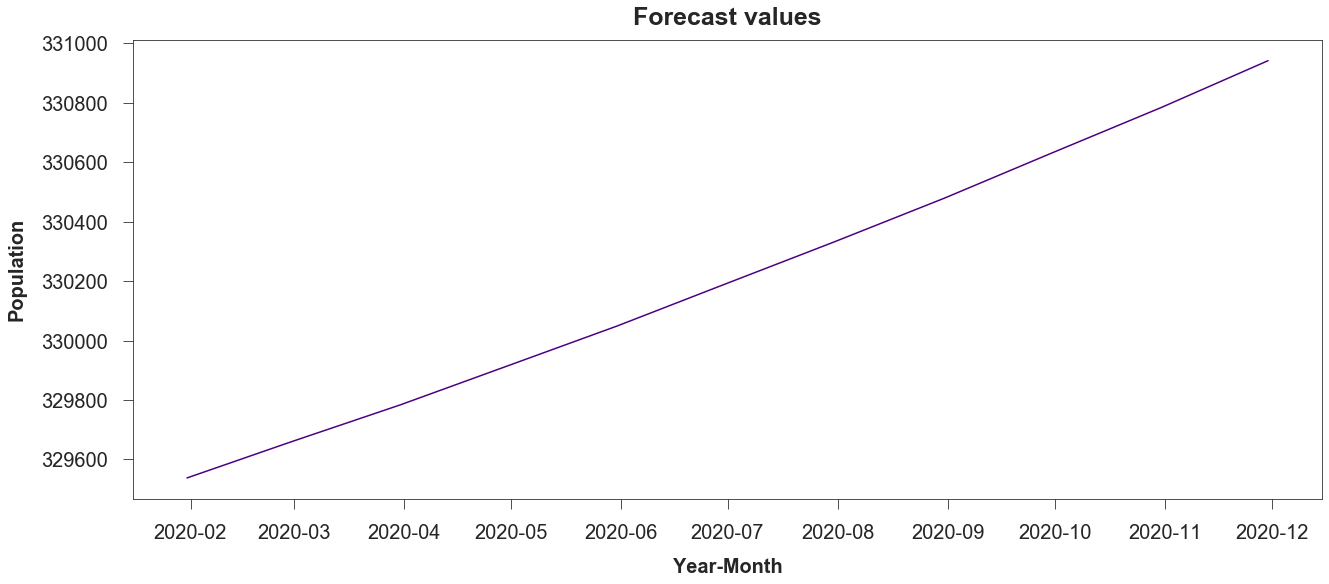

[329537.8657288  329658.24991214 329783.82583576 329914.28612819
 330049.34161553 330188.72024416 330332.16606706 330479.4382903
 330630.31037592 330784.56919787 330942.01424801]
DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', freq='M')


In [17]:
plt.figure(figsize = (20,10))
plt.title('Moving average - Original vs Fitted', weight = 'bold', fontsize = 25, pad= 15)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)                                  
plt.tight_layout(pad = 5)                                               
plt.rc('font', size = 15)
plt.rc('font', weight = 'normal')
plt.plot(diff, label = 'Original', color = 'lightgreen')
plt.plot(df.index[1:], model_fit.fittedvalues[0:], label = 'Fit', color = 'darkred')
plt.legend(loc = 'best', prop = {'size':15})
plt.show()

plt.figure(figsize = (20,10))
plt.title('Forecast values', weight = 'bold', fontsize = 25, pad= 15)
plt.xlabel('Year-Month', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)                                  
plt.tight_layout(pad = 5)                                               
plt.rc('font', size = 15)
plt.rc('font', weight = 'normal')
date = pd.date_range(start='2020-01', end='2020-12', freq='M')
plt.plot(date, prediction, color = 'indigo')
plt.show()

print(prediction)
print(date)